In [1]:
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image, ImageOps
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

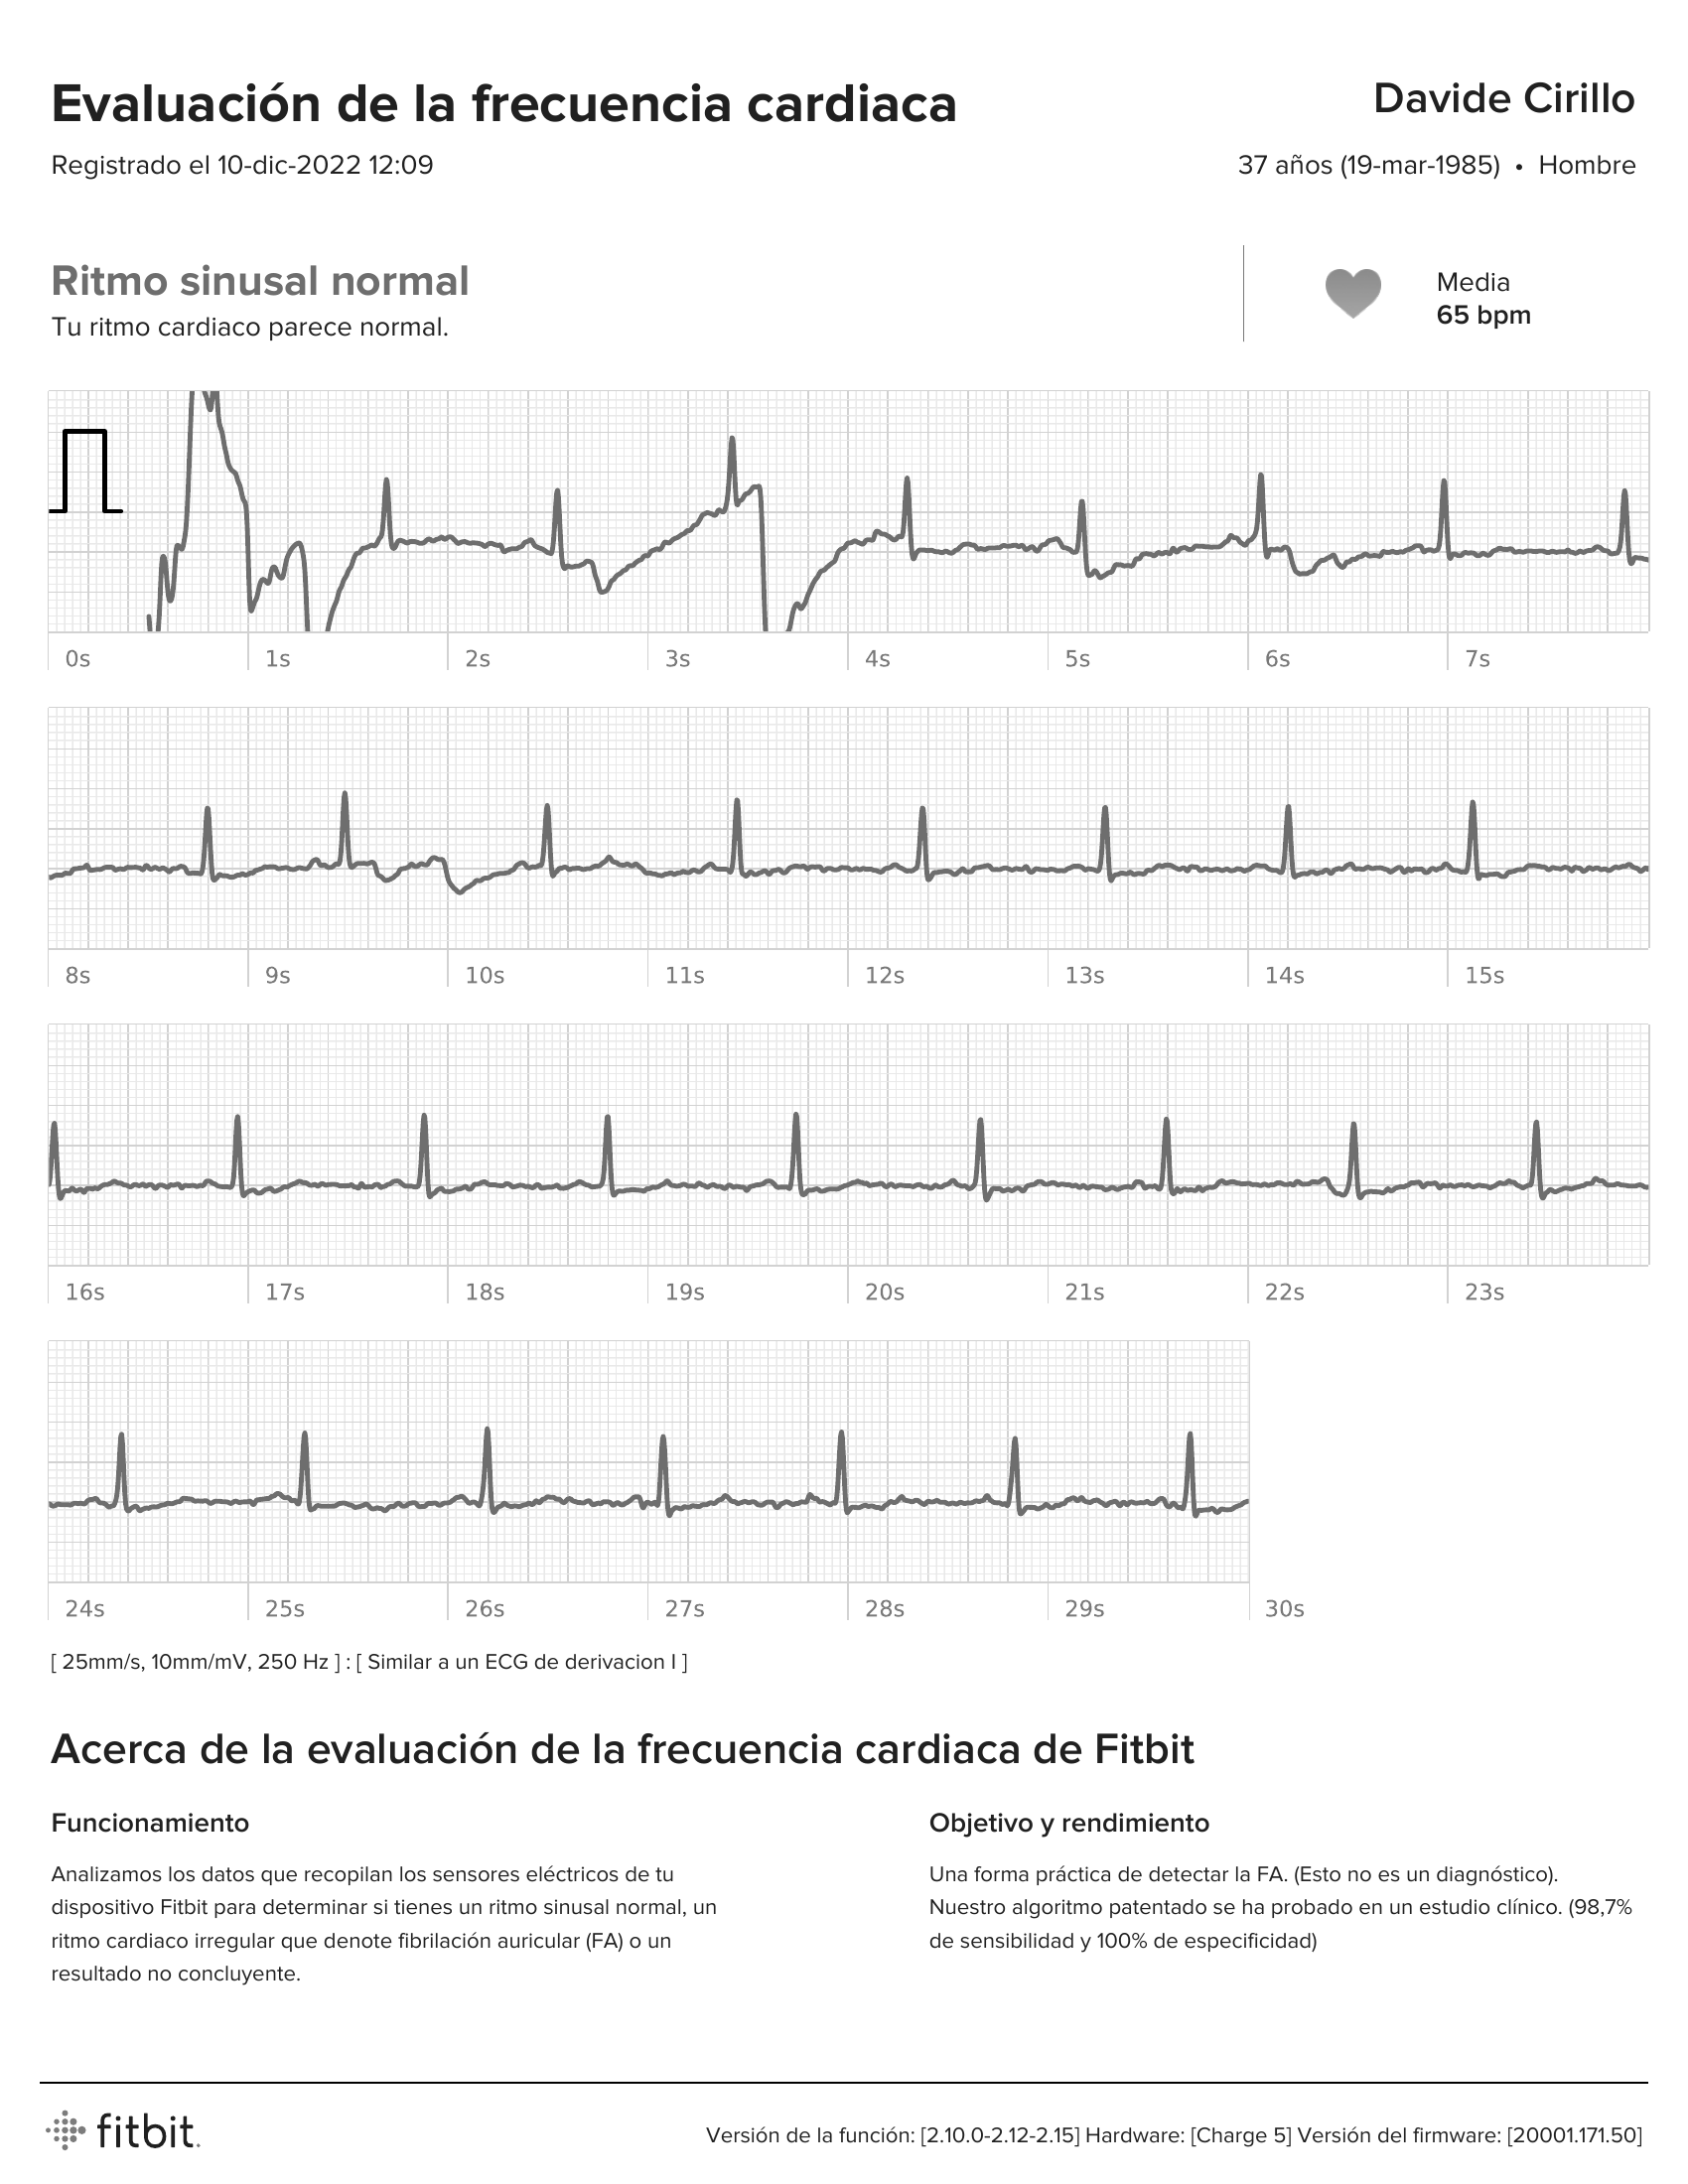

In [2]:
image = convert_from_path('/home/dcirillo/Desktop/FitBit_ECG_extraction/test.pdf')
# convert the image to grayscale
im = ImageOps.grayscale(image[0])
im

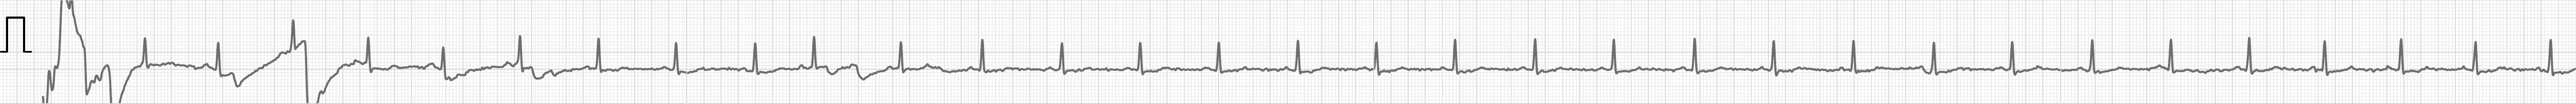

In [3]:
# crop the image and paste the pieces together
width, height = im.size

n = 319
left = 49
right = 1662

top1, bottom1 = 393, 638
top2, bottom2 = top1 + n, bottom1 + n
top3, bottom3 = top2 + n, bottom2 + n
top4, bottom4 = top3 + n, bottom3 + n

im1 = im.crop((left, top1, right, bottom1))
im2 = im.crop((left, top2, right, bottom2))
im3 = im.crop((left, top3, right, bottom3))
im4 = im.crop((left, top4, 1258, bottom4))

imgs = [im1, im2, im3, im4]
imgs_comb = np.hstack(imgs)
imgs_comb = Image.fromarray(imgs_comb)

imgs_comb.save('test_cropped.jpg')

imgs_comb

(245, 6048)


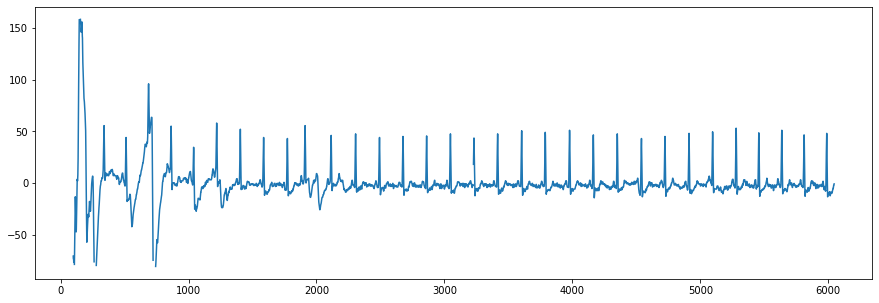

In [5]:
# convert the image to an array, keep only the ECG line, and save the csv
data = asarray(imgs_comb.transpose(Image.FLIP_TOP_BOTTOM))
print(data.shape)

n = 111
data[data < 100] = 255
data[data < n] = 0
data[data >= n] = 255
im = Image.fromarray(data)
mat = list()
for i in range(data.shape[1]):
    l = np.where(data.T[i]==0)[0]
    if len(l) > 0:
        mat.append([i, np.mean(l)]) # average of multiple vertical pixels
    else:
        mat.append([i, np.nan])

df = pd.DataFrame.from_records(mat)
df.columns = ['x','y']
df['y'] = df['y'] - (250/30)*10 # set zero

df.to_csv('test.csv')
plt.plot(df['x'],df['y'],'-')